In [78]:
#libraries

#Data wrangling tools
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# datadotworld SDK
import datadotworld as ddw

import time

In [79]:
# Data input

mortdf = pd.read_csv('death.csv')
incddf = pd.read_csv('incd.csv')

In [80]:
mortdf.head()

,State,FIPS,Met Healthy People Objective of ***?,"Age-Adjusted Death Rate([rate note]) - deaths per 100,000",Lower CI (Rate),Upper CI (Rate),CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Death Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval
0,United States,0,***,38.5,38.4,38.6,N/A,N/A,N/A,149208,falling,-5,-5.4,-4.5
1,"Union County, Florida",12125,***,147.9,122.8,176.9,N/A,1,1,27,stable,-0.4,-1.7,0.9
2,"Galax City, Virginia",51640,***,120.8,91.3,158.1,N/A,1,5,12,rising,18.9,1.1,39.8
3,"Carroll County, Kentucky",21041,***,108.1,83.9,137.6,N/A,1,52,14,stable,1.3,-0.1,2.7
4,"Breathitt County, Kentucky",21025,***,101.3,80.8,125.8,N/A,1,55,18,stable,-0.9,-2.5,0.8


In [81]:
mortdf.describe()

,FIPS
count,3142.000000
mean,30405.524507
std,15173.955130
min,0.000000
25%,18179.500000
50%,29178.000000
75%,45082.500000
max,72001.000000


In [82]:
incddf.head()

,State,FIPS,Met Healthy People Objective of ***?,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,US (SEER+NPCR)(1),0,***,58.3,58.2,58.4,N/A,N/A,N/A,221568,falling,-2,-2.2,-1.9
1,"Union County, Florida(6)",12125,***,196.3,168.2,228.1,N/A,1,1,38,falling,-2.2,-4.1,-0.2
2,"Owsley County, Kentucky(7)",21189,***,164.7,122.8,218.2,N/A,1,61,11,stable,2.1,-0.6,4.8
3,"Breathitt County, Kentucky(7)",21025,***,149.1,123.9,178.3,N/A,1,36,26,stable,1.4,-1.9,4.9
4,"Hardin County, Illinois(6)",17069,***,133.6,96.4,183.8,N/A,1,49,9,*,*,*,*


In [83]:
incddf.describe()

,FIPS
count,3142.000000
mean,30405.524507
std,15173.955130
min,0.000000
25%,18179.500000
50%,29178.000000
75%,45082.500000
max,72001.000000


In [84]:
mortdf[' FIPS'] = mortdf[' FIPS'].apply(lambda x: str(int(x))).astype(np.object_).str.pad(5,'left','0')

In [85]:
#Aligning FIPS name correctly in the dataframe
mortdf.rename(columns={" FIPS": "FIPS"},inplace=True)
mortdf.head()

,State,FIPS,Met Healthy People Objective of ***?,"Age-Adjusted Death Rate([rate note]) - deaths per 100,000",Lower CI (Rate),Upper CI (Rate),CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Death Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval
0,United States,00000,***,38.5,38.4,38.6,N/A,N/A,N/A,149208,falling,-5,-5.4,-4.5
1,"Union County, Florida",12125,***,147.9,122.8,176.9,N/A,1,1,27,stable,-0.4,-1.7,0.9
2,"Galax City, Virginia",51640,***,120.8,91.3,158.1,N/A,1,5,12,rising,18.9,1.1,39.8
3,"Carroll County, Kentucky",21041,***,108.1,83.9,137.6,N/A,1,52,14,stable,1.3,-0.1,2.7
4,"Breathitt County, Kentucky",21025,***,101.3,80.8,125.8,N/A,1,55,18,stable,-0.9,-2.5,0.8


In [86]:
incddf[' FIPS'] = incddf[' FIPS'].apply(lambda x: str(int(x))).astype(np.object_).str.pad(5,'left','0')
incddf.rename(columns={" FIPS":"FIPS"},inplace=True)
incddf.FIPS

0       00000
1       12125
2       21189
3       21025
4       17069
5       21121
6       21197
7       21041
8       21193
9       21071
10      21147
11      02185
12      21051
13      21235
14      21095
15      51640
16      47095
17      54059
18      21131
19      29129
20      21011
21      21159
22      05111
23      21135
24      05075
25      29133
26      29187
27      21023
28      21195
29      21065
        ...  
3112    27157
3113    20197
3114    02270
3115    27159
3116    53069
3117    20199
3118    27161
3119    08121
3120    20201
3121    27163
3122    27165
3123    49055
3124    13307
3125    30107
3126    31183
3127    41069
3128    30109
3129    20203
3130    27167
3131    20205
3132    27169
3133    20207
3134    29227
3135    27171
3136    20209
3137    02282
3138    27173
3139    48505
3140    48507
3141    46137
Name: FIPS, Length: 3142, dtype: object

In [87]:
mortdf = mortdf[mortdf.FIPS.notnull()]

In [88]:
incddf = incddf[incddf.FIPS.notnull()]

In [89]:
mortdf.head()

,State,FIPS,Met Healthy People Objective of ***?,"Age-Adjusted Death Rate([rate note]) - deaths per 100,000",Lower CI (Rate),Upper CI (Rate),CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Death Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval
0,United States,00000,***,38.5,38.4,38.6,N/A,N/A,N/A,149208,falling,-5,-5.4,-4.5
1,"Union County, Florida",12125,***,147.9,122.8,176.9,N/A,1,1,27,stable,-0.4,-1.7,0.9
2,"Galax City, Virginia",51640,***,120.8,91.3,158.1,N/A,1,5,12,rising,18.9,1.1,39.8
3,"Carroll County, Kentucky",21041,***,108.1,83.9,137.6,N/A,1,52,14,stable,1.3,-0.1,2.7
4,"Breathitt County, Kentucky",21025,***,101.3,80.8,125.8,N/A,1,55,18,stable,-0.9,-2.5,0.8


In [90]:
#Dropping irrelevant columns from the dataframe
mortdf.drop(mortdf.columns[[0,2,4,5,6,7,8,10]].values, axis=1,inplace=True)

In [91]:
incddf.head()

,State,FIPS,Met Healthy People Objective of ***?,"Age-Adjusted Incidence Rate([rate note]) - cases per 100,000",Lower 95% Confidence Interval,Upper 95% Confidence Interval,CI*Rank([rank note]),Lower CI (CI*Rank),Upper CI (CI*Rank),Average Annual Count,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,US (SEER+NPCR)(1),00000,***,58.3,58.2,58.4,N/A,N/A,N/A,221568,falling,-2,-2.2,-1.9
1,"Union County, Florida(6)",12125,***,196.3,168.2,228.1,N/A,1,1,38,falling,-2.2,-4.1,-0.2
2,"Owsley County, Kentucky(7)",21189,***,164.7,122.8,218.2,N/A,1,61,11,stable,2.1,-0.6,4.8
3,"Breathitt County, Kentucky(7)",21025,***,149.1,123.9,178.3,N/A,1,36,26,stable,1.4,-1.9,4.9
4,"Hardin County, Illinois(6)",17069,***,133.6,96.4,183.8,N/A,1,49,9,*,*,*,*


In [92]:
incddf.drop(incddf.columns[[0,2,4,5,6,7,8]].values, axis=1,inplace=True)

In [93]:
incddf.rename(columns={incddf.columns[1]: "Incident_Rate", incddf.columns[2]:"Avg_Ann_Incidence"},inplace=True)

In [94]:
mortdf.rename(columns={mortdf.columns[1]:"Mortality_Rate", mortdf.columns[2]:"Avg_Ann_Deaths"},inplace=True)

In [95]:
mortdf.head()

,FIPS,Mortality_Rate,Avg_Ann_Deaths,Recent 5-Year Trend ([trend note]) in Death Rates,Lower 95% Confidence Interval,Upper 95% Confidence Interval
0,00000,38.5,149208,-5,-5.4,-4.5
1,12125,147.9,27,-0.4,-1.7,0.9
2,51640,120.8,12,18.9,1.1,39.8
3,21041,108.1,14,1.3,-0.1,2.7
4,21025,101.3,18,-0.9,-2.5,0.8


In [96]:
incddf.head()

,FIPS,Incident_Rate,Avg_Ann_Incidence,Recent Trend,Recent 5-Year Trend ([trend note]) in Incidence Rates,Lower 95% Confidence Interval.1,Upper 95% Confidence Interval.1
0,00000,58.3,221568,falling,-2,-2.2,-1.9
1,12125,196.3,38,falling,-2.2,-4.1,-0.2
2,21189,164.7,11,stable,2.1,-0.6,4.8
3,21025,149.1,26,stable,1.4,-1.9,4.9
4,17069,133.6,9,*,*,*,*


In [97]:
pov = ddw.load_dataset('uscensusbureau/acs-2015-5-e-poverty')

tables = []
for i in pov.tables:
    if len(i) == 2:
        tables.append(i)

# remove Puerto Rico
tables.remove('pr')

In [98]:
print(len(tables))

51


In [99]:
np.array(tables)

array(['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me',
       'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm',
       'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy'], dtype='<U2')

In [100]:
# Retrieve the Census poverty data from data.world
start = time.time()

# a string - the poverty columns we want from the Census ACS 
cols = '`State`, `StateFIPS`, `CountyFIPS`, `AreaName`, `B17001_002`, `B17001_003`, `B17001_017`'

# call the data for each state and concatenate
for i, state in enumerate(tables):
    if i == 0:
        povdf = ddw.query('uscensusbureau/acs-2015-5-e-poverty',
                  '''SELECT %s FROM `AK`
                     WHERE SummaryLevel=50''' % cols).dataframe 
    else:
        df = ddw.query('uscensusbureau/acs-2015-5-e-poverty',
                       '''SELECT %s FROM `%s`
                          WHERE SummaryLevel=50''' % (cols, state.upper())).dataframe
    
        povdf = pd.concat([povdf, df], ignore_index=True)

end = time.time()

print(end - start)


# Add leading zeros to the state and county FIPS codes
povdf['StateFIPS'] = povdf.StateFIPS.astype(np.object_)\
                                    .apply(lambda x: str(x))\
                                    .str.pad(2, 'left', '0')
povdf['CountyFIPS'] = povdf.CountyFIPS.astype(np.object_)\
                                      .apply(lambda x: str(x))\
                                      .str.pad(3, 'left', '0')

povdf.rename(columns={'B17001_002':'All_Poverty', 'B17001_003':'M_Poverty', 'B17001_017':'F_Poverty'},
             inplace=True)

161.80261635780334


In [101]:
povdf[povdf['M_Poverty' ] < povdf['F_Poverty']]

,State,StateFIPS,CountyFIPS,AreaName,All_Poverty,M_Poverty,F_Poverty
2,AK,02,020,"Anchorage Municipality, Alaska",23914,10698,13216
4,AK,02,060,"Bristol Bay Borough, Alaska",69,33,36
6,AK,02,070,"Dillingham Census Area, Alaska",894,446,448
7,AK,02,090,"Fairbanks North Star Borough, Alaska",7752,3523,4229
9,AK,02,105,"Hoonah-Angoon Census Area, Alaska",252,102,150
11,AK,02,122,"Kenai Peninsula Borough, Alaska",5558,2596,2962
12,AK,02,130,"Ketchikan Gateway Borough, Alaska",1640,792,848
14,AK,02,158,"Kusilvak Census Area, Alaska",2622,1290,1332
15,AK,02,164,"Lake and Peninsula Borough, Alaska",247,119,128
16,AK,02,170,"Matanuska-Susitna Borough, Alaska",9454,4346,5108


In [102]:
cols = '`StateFIPS`, `CountyFIPS`,'\
       '`B19013_001`, `B19013A_001`, `B19013B_001`, `B19013C_001`, `B19013D_001`,'\
       '`B19013I_001`'

start = time.time()

for i, state in enumerate(tables):
    if i == 0:
        incomedf = ddw.query('uscensusbureau/acs-2015-5-e-income',
                  '''SELECT %s FROM `AK`
                     WHERE SummaryLevel=50''' % cols).dataframe 
    else:
        df = ddw.query('uscensusbureau/acs-2015-5-e-income',
                       '''SELECT %s FROM `%s`
                          WHERE SummaryLevel=50''' % (cols, state.upper())).dataframe
        incomedf = pd.concat([incomedf, df], ignore_index=True)

        end = time.time()

print(end - start)

incomedf['StateFIPS'] = incomedf.StateFIPS.astype(np.object_)\
                                .apply(lambda x: str(x))\
                                .str.pad(2, 'left', '0')
incomedf['CountyFIPS'] = incomedf.CountyFIPS.astype(np.object_)\
                                 .apply(lambda x: str(x))\
                                 .str.pad(3, 'left', '0')

incomedf.rename(columns={'B19013_001':'Med_Income', 'B19013A_001':'Med_Income_White', 
                         'B19013B_001':'Med_Income_Black', 'B19013C_001':'Med_Income_Nat_Am',
                         'B19013D_001':'Med_Income_Asian', 'B19013I_001':'Hispanic'}, inplace=True)

119.47065305709839


In [103]:
cols = '`StateFIPS`, `CountyFIPS`,'\
       '`B27001_004`, `B27001_005`, `B27001_007`, `B27001_008`,'\
       '`B27001_010`, `B27001_011`, `B27001_013`, `B27001_014`,'\
       '`B27001_016`, `B27001_017`, `B27001_019`, `B27001_020`,'\
       '`B27001_022`, `B27001_023`, `B27001_025`, `B27001_026`,'\
       '`B27001_028`, `B27001_029`, `B27001_032`, `B27001_033`,'\
       '`B27001_035`, `B27001_036`, `B27001_038`, `B27001_039`,'\
       '`B27001_041`, `B27001_042`, `B27001_044`, `B27001_045`,'\
       '`B27001_047`, `B27001_048`, `B27001_050`, `B27001_051`,'\
       '`B27001_053`, `B27001_054`, `B27001_056`, `B27001_057`'
# male <= 029   

start = time.time()

for i, state in enumerate(tables):
    if i == 0:
        hinsdf = ddw.query('uscensusbureau/acs-2015-5-e-healthinsurance',
                  '''SELECT %s FROM `AK`
                     WHERE SummaryLevel=50''' % cols).dataframe 
   
    else:
        df = ddw.query('uscensusbureau/acs-2015-5-e-healthinsurance',
                       '''SELECT %s FROM `%s`
                          WHERE SummaryLevel=50''' % (cols, state.upper())).dataframe
        hinsdf = pd.concat([hinsdf, df], ignore_index=True)

end = time.time()
print(end - start)

hinsdf['StateFIPS'] = hinsdf.StateFIPS.astype(np.object_)\
                                      .apply(lambda x: str(x))\
                                      .str.pad(2, 'left', '0')
hinsdf['CountyFIPS'] = hinsdf.CountyFIPS.astype(np.object_)\
                                        .apply(lambda x: str(x))\
                                        .str.pad(3, 'left', '0')

100.37887597084045


In [104]:
# columns representing males' health insurance statistics
males = ['`B27001_004`', '`B27001_005`', '`B27001_007`', '`B27001_008`',
           '`B27001_010`', '`B27001_011`', '`B27001_013`', '`B27001_014`',
           '`B27001_016`', '`B27001_017`', '`B27001_019`', '`B27001_020`',
           '`B27001_022`', '`B27001_023`', '`B27001_025`', '`B27001_026`',
           '`B27001_028`', '`B27001_029`']

# females' health insurance statistics
females = ['`B27001_032`', '`B27001_033`', '`B27001_035`', '`B27001_036`', 
           '`B27001_038`', '`B27001_039`', '`B27001_041`', '`B27001_042`', 
           '`B27001_044`', '`B27001_045`', '`B27001_047`', '`B27001_048`', 
           '`B27001_050`', '`B27001_051`', '`B27001_053`', '`B27001_054`', 
           '`B27001_056`', '`B27001_057`']

# separate the "with" and "without" health insurance columns
males_with = []
males_without = []
females_with = []
females_without = []

# strip the backticks
for i, j in enumerate(males):
    if i % 2 == 0:
        males_with.append(j.replace('`', ''))
    else:
        males_without.append(j.replace('`', ''))
        
for i, j in enumerate(females):
    if i % 2 == 0:
        females_with.append(j.replace('`', ''))
    else:
        females_without.append(j.replace('`', ''))

# Create features that sum all the individual age group
clist = [males_with, males_without, females_with, females_without]
newcols = ['M_With', 'M_Without', 'F_With', 'F_Without'] 

for col in newcols:
    hinsdf[col] = 0

for i in males_with:
    hinsdf['M_With'] += hinsdf[i]  
for i in males_without:
    hinsdf['M_Without'] += hinsdf[i]
for i in females_with:
    hinsdf['F_With'] += hinsdf[i]
for i in females_without:
    hinsdf['F_Without'] += hinsdf[i]

hinsdf['All_With'] = hinsdf.M_With + hinsdf.F_With
hinsdf['All_Without'] = hinsdf.M_Without + hinsdf.F_Without

# Remove all the individual age group variables
# but, save them as a df called hinsdf_extra (just in case)
hinsdf_extra = df.loc[:, df.columns[df.columns.str.contains('B27001')].values]
hinsdf.drop(df.columns[df.columns.str.contains('B27001')].values, axis=1, inplace=True)

In [105]:
dfs = [povdf, incomedf, hinsdf, incddf, mortdf]


In [106]:
dfs

[     State StateFIPS CountyFIPS                                   AreaName  \
 0       AK        02        013             Aleutians East Borough, Alaska   
 1       AK        02        016         Aleutians West Census Area, Alaska   
 2       AK        02        020             Anchorage Municipality, Alaska   
 3       AK        02        050                 Bethel Census Area, Alaska   
 4       AK        02        060                Bristol Bay Borough, Alaska   
 5       AK        02        068                     Denali Borough, Alaska   
 6       AK        02        070             Dillingham Census Area, Alaska   
 7       AK        02        090       Fairbanks North Star Borough, Alaska   
 8       AK        02        100                     Haines Borough, Alaska   
 9       AK        02        105          Hoonah-Angoon Census Area, Alaska   
 10      AK        02        110            Juneau City and Borough, Alaska   
 11      AK        02        122            Kenai Pe

In [107]:
# create FIPS features
for df in [povdf, incomedf, hinsdf]:
    df['FIPS'] = df.StateFIPS + df.CountyFIPS
    df.drop(['StateFIPS', 'CountyFIPS'], axis=1, inplace=True)

In [108]:
# use the pandas isin() method to see the intersections of FIPS features
# across dataframes
[[i, ii, sum(pd.Series(j.FIPS.unique()).isin(dfs[ii].FIPS))] 
    for i, j in enumerate(dfs) for ii in range(len(dfs))]

[[0, 0, 3142],
 [0, 1, 3142],
 [0, 2, 3142],
 [0, 3, 3134],
 [0, 4, 3134],
 [1, 0, 3142],
 [1, 1, 3142],
 [1, 2, 3142],
 [1, 3, 3134],
 [1, 4, 3134],
 [2, 0, 3142],
 [2, 1, 3142],
 [2, 2, 3142],
 [2, 3, 3134],
 [2, 4, 3134],
 [3, 0, 3134],
 [3, 1, 3134],
 [3, 2, 3134],
 [3, 3, 3142],
 [3, 4, 3142],
 [4, 0, 3134],
 [4, 1, 3134],
 [4, 2, 3134],
 [4, 3, 3142],
 [4, 4, 3142]]

In [109]:
# look at the number of unique FIPS values per dataframe
for i in dfs:
    print(len(i.FIPS.unique()))

3142
3142
3142
3142
3142


In [110]:
# check to see if all the FIPS values are 5 digits in length
dfs = [povdf, incomedf, hinsdf, incddf, mortdf] # our 5 dataframes to merge
for i, j in enumerate(dfs):
    lens = []
    for fips in j.FIPS.values:
        lens.append(len(fips))
    print(pd.Series(lens).value_counts(), '\n', '-'*10)  

5    3142
dtype: int64 
 ----------
5    3142
dtype: int64 
 ----------
5    3142
dtype: int64 
 ----------
5    3142
dtype: int64 
 ----------
5    3142
dtype: int64 
 ----------


In [111]:
for i,j in enumerate(dfs):
    print(j)
    len(j)

     State                                   AreaName  All_Poverty  M_Poverty  \
0       AK             Aleutians East Borough, Alaska          553        334   
1       AK         Aleutians West Census Area, Alaska          499        273   
2       AK             Anchorage Municipality, Alaska        23914      10698   
3       AK                 Bethel Census Area, Alaska         4364       2199   
4       AK                Bristol Bay Borough, Alaska           69         33   
5       AK                     Denali Borough, Alaska          254        139   
6       AK             Dillingham Census Area, Alaska          894        446   
7       AK       Fairbanks North Star Borough, Alaska         7752       3523   
8       AK                     Haines Borough, Alaska          135         74   
9       AK          Hoonah-Angoon Census Area, Alaska          252        102   
10      AK            Juneau City and Borough, Alaska         2110       1145   
11      AK            Kenai 

In [112]:
for i, j in enumerate(dfs):
    if i == 0:
        fulldf = j.copy()
    else:
        fulldf = fulldf.merge(j, how='inner', on='FIPS')

In [113]:
fulldf.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'Incident_Rate', 'Avg_Ann_Incidence', 'Recent Trend',
       'Recent 5-Year Trend ([trend note]) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1',
       'Mortality_Rate', 'Avg_Ann_Deaths',
       'Recent 5-Year Trend ([trend note]) in Death Rates',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval'],
      dtype='object')

In [114]:
fulldf.drop(fulldf.columns[[21,22,23,26,27,28]].values,axis=1,inplace=True)

In [115]:
fulldf.shape

(3134, 23)

In [116]:
fulldf.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'Incident_Rate', 'Avg_Ann_Incidence', 'Recent Trend', 'Mortality_Rate',
       'Avg_Ann_Deaths'],
      dtype='object')

## Exploratory Data Analysis

In [117]:
fulldf.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,M_Without,F_With,F_Without,All_With,All_Without,Incident_Rate,Avg_Ann_Incidence,Recent Trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,02013,61518.0,72639.0,31250.0,54750,...,1317,566,540,1442,1857,*,3 or fewer,*,*,3 or fewer
1,AK,"Aleutians West Census Area, Alaska",499,273,226,02016,84306.0,97321.0,93750.0,48750,...,769,1707,564,4177,1333,*,3 or fewer,*,*,3 or fewer
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,02020,78326.0,87235.0,50535.0,53935,...,23245,122426,21393,243173,44638,51.3,126,stable,33.1,80
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,02050,51012.0,92647.0,73661.0,41594,...,2708,6627,1774,13023,4482,51,6,stable,39.7,4
4,AK,"Bristol Bay Borough, Alaska",69,33,36,02060,79750.0,88000.0,NaN,63333,...,124,349,67,768,191,*,3 or fewer,*,*,3 or fewer


In [118]:
for col in fulldf.columns:
    print((col,sum(fulldf[col].isnull())))

('State', 0)
('AreaName', 0)
('All_Poverty', 0)
('M_Poverty', 0)
('F_Poverty', 0)
('FIPS', 0)
('Med_Income', 1)
('Med_Income_White', 2)
('Med_Income_Black', 1210)
('Med_Income_Nat_Am', 1660)
('Med_Income_Asian', 1757)
('Hispanic', 681)
('M_With', 0)
('M_Without', 0)
('F_With', 0)
('F_Without', 0)
('All_With', 0)
('All_Without', 0)
('Incident_Rate', 0)
('Avg_Ann_Incidence', 0)
('Recent Trend', 0)
('Mortality_Rate', 0)
('Avg_Ann_Deaths', 0)


In [119]:
# The median income data is incomplete, let's get rid of all except the broad med_income.
fulldf.drop(fulldf.columns[[7,8,9,10,11]], axis=1, inplace=True)

In [120]:
fulldf.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incident_Rate,Avg_Ann_Incidence,Recent Trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,02013,61518.0,876,1317,566,540,1442,1857,*,3 or fewer,*,*,3 or fewer
1,AK,"Aleutians West Census Area, Alaska",499,273,226,02016,84306.0,2470,769,1707,564,4177,1333,*,3 or fewer,*,*,3 or fewer
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,02020,78326.0,120747,23245,122426,21393,243173,44638,51.3,126,stable,33.1,80
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,02050,51012.0,6396,2708,6627,1774,13023,4482,51,6,stable,39.7,4
4,AK,"Bristol Bay Borough, Alaska",69,33,36,02060,79750.0,419,124,349,67,768,191,*,3 or fewer,*,*,3 or fewer


In [121]:
# We will create data dictionary for the above merged data
data_dict = pd.DataFrame(fulldf.columns.values, index=range(len(fulldf.columns)), columns=['Features'])

In [122]:
data_dict['Definition'] = ['','','Both male and female reported below poverty line (Raw)', 
                           'Males below poverty (Raw)', 'Females below poverty (Raw)', 'State + County FIPS (Raw)',
                           'Med_Income all enthnicities (Raw)', 'Males with health insurance (Raw)',
                           'Males without health insurance (Raw)', 'Females with health insurance (Raw)',
                           'Females without health insurance (Raw)', 'Males and Femaes with health ins. (Raw)',
                           'Males an Females without health ins (Raw)', 'Lung cancer incidence rate (per 100,000)',
                           'Average lung cancer incidence rate (Raw)', 'Recent trend (incidence)', 
                           'Lung cancer mortality rate (per 100,000)', 'Average lung cancer mortalities (Raw)']
data_dict['Notes'] = ''
data_dict.loc[[13,16], 'Notes'] = "'*' = fewer than 16 reported cases"

data_dict

,Features,Definition,Notes
0,State,,
1,AreaName,,
2,All_Poverty,Both male and female reported below poverty li...,
3,M_Poverty,Males below poverty (Raw),
4,F_Poverty,Females below poverty (Raw),
5,FIPS,State + County FIPS (Raw),
6,Med_Income,Med_Income all enthnicities (Raw),
7,M_With,Males with health insurance (Raw),
8,M_Without,Males without health insurance (Raw),
9,F_With,Females with health insurance (Raw),


In [123]:
# Now we need to take care of the different data types in the data frame
def get_types(col_name):
    types = (pd.Series([type(i) for i in fulldf[col_name]])).value_counts()
    print("%s\n" % feature, types, "\n", "-"*30)

In [124]:
for feature in fulldf.columns:
    get_types(feature)

State
 <class 'str'>    3134
dtype: int64 
 ------------------------------
AreaName
 <class 'str'>    3134
dtype: int64 
 ------------------------------
All_Poverty
 <class 'int'>    3134
dtype: int64 
 ------------------------------
M_Poverty
 <class 'int'>    3134
dtype: int64 
 ------------------------------
F_Poverty
 <class 'int'>    3134
dtype: int64 
 ------------------------------
FIPS
 <class 'str'>    3134
dtype: int64 
 ------------------------------
Med_Income
 <class 'float'>    3134
dtype: int64 
 ------------------------------
M_With
 <class 'int'>    3134
dtype: int64 
 ------------------------------
M_Without
 <class 'int'>    3134
dtype: int64 
 ------------------------------
F_With
 <class 'int'>    3134
dtype: int64 
 ------------------------------
F_Without
 <class 'int'>    3134
dtype: int64 
 ------------------------------
All_With
 <class 'int'>    3134
dtype: int64 
 ------------------------------
All_Without
 <class 'int'>    3134
dtype: int64 
 --------------

In [125]:
# This script isolates values that fail to covert to numeric

def fails(column):
    typ = []
    for _, j in enumerate(column):
        
        try:
            pd.to_numeric(j)
        except:
            typ.append(j)
    
    print(pd.Series(typ).value_counts())

In [126]:
fails(fulldf.Mortality_Rate)

*     379
dtype: int64


####  (!)Note: We have a decision to make about what to do with the 379 counties which reported fewer than 16 deaths and have missing mortality rate values (*).
Is the fact that fewer than 16 cases were reported due to poor reporting? In that case we may want to delete those observations. Or, we may want to try to impute the values.
- Do we think these data points are accurate? In that case we may want to change "*" to zero, or a number smaller than 16.
- If the observations are actually valid and we remove them, then we add bias to the model.
- If the observations are noise, then we should either delete them or impute them.
- The key here is to make in informed decision and to prepare an explanation and defense of why you made that decision.
- Let's explore the data to inform our decision.

In [127]:
fulldf.loc[fulldf.Mortality_Rate == '* ','State'].value_counts()

TX    65
NE    45
KS    39
SD    37
ND    34
CO    29
MT    24
AK    12
ID    12
UT    11
GA     9
NV     8
OK     8
NM     7
MN     6
MO     5
VA     5
OR     4
CA     3
WY     3
IA     3
WA     2
MS     2
WI     1
MI     1
HI     1
KY     1
IL     1
NC     1
Name: State, dtype: int64

min 11.5 max 147.9


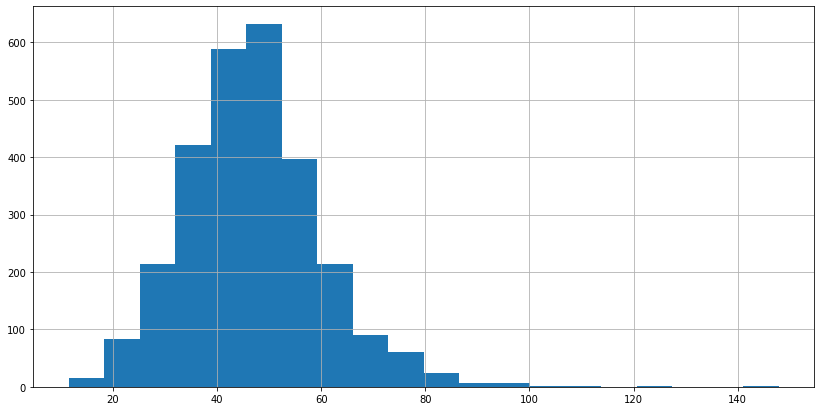

In [128]:
# Histogram to see how exceptional a low rate of mortality is
mhist = pd.to_numeric(fulldf.Mortality_Rate[fulldf.Mortality_Rate != '* '])
print("min", mhist.min(), "max", mhist.max())
mhist.hist(figsize=(14,7), bins=20);

In [129]:
# We need to check if the places with low population have less than 16 mortality cases are actually 
# low population or is it just noise. Now, we will get the population data sorted by county values.

populationdf = ddw.query('nrippner/us-population-estimates-2015',
                         '''SELECT `POPESTIMATE2015`, `STATE`, `COUNTY`
                            FROM `CO-EST2015-alldata`''').dataframe

In [130]:
populationdf.shape

(3193, 3)

In [131]:
populationdf.head()

,POPESTIMATE2015,STATE,COUNTY
0,4858979,1,0
1,55347,1,1
2,203709,1,3
3,26489,1,5
4,22583,1,7


In [132]:
# Now we want to create FIPS feature to match up with our current data set

statecode = populationdf.STATE.apply(lambda x:str(x)).str.pad(2,'left','0')

countycode = populationdf.COUNTY.apply(lambda x:str(x)).str.pad(3, 'left', '0')

populationdf['FIPS'] = statecode + countycode

populationdf.head()

,POPESTIMATE2015,STATE,COUNTY,FIPS
0,4858979,1,0,01000
1,55347,1,1,01001
2,203709,1,3,01003
3,26489,1,5,01005
4,22583,1,7,01007


In [133]:
# Let's check how our new data matches up with our previous data 
print(sum(pd.Series(fulldf.FIPS.unique()).isin(populationdf.FIPS)), 'matches out of')
print("%d unique values " %len(fulldf.FIPS.unique()))

3134 matches out of
3134 unique values 


In [134]:
# Nice! We have all the matching FIPS 
fulldf = fulldf.merge(populationdf[['FIPS', 'POPESTIMATE2015']], on='FIPS', how='inner')

In [135]:
fulldf.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incident_Rate,Avg_Ann_Incidence,Recent Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
0,AK,"Aleutians East Borough, Alaska",553,334,219,02013,61518.0,876,1317,566,540,1442,1857,*,3 or fewer,*,*,3 or fewer,3341
1,AK,"Aleutians West Census Area, Alaska",499,273,226,02016,84306.0,2470,769,1707,564,4177,1333,*,3 or fewer,*,*,3 or fewer,5702
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,02020,78326.0,120747,23245,122426,21393,243173,44638,51.3,126,stable,33.1,80,298695
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,02050,51012.0,6396,2708,6627,1774,13023,4482,51,6,stable,39.7,4,17946
4,AK,"Bristol Bay Borough, Alaska",69,33,36,02060,79750.0,419,124,349,67,768,191,*,3 or fewer,*,*,3 or fewer,892


In [136]:
# Now we can check if the county with less than 16 incidence rates are really low population or is it just noise.
pop_median = fulldf.POPESTIMATE2015.median()
pop_mean = fulldf.POPESTIMATE2015.mean()


print("median, mean population :     %.1f, %.1f" % (pop_median, pop_mean))

print("median, mean population with '*' :     %.1f, %.1f" % (fulldf.POPESTIMATE2015[fulldf.Mortality_Rate == '* '].median(), fulldf.POPESTIMATE2015[fulldf.Mortality_Rate == '* '].mean()))

print("median, mean population without '*' :     %.1f, %.1f" % (fulldf.POPESTIMATE2015[fulldf.Mortality_Rate != '* '].median()
                                                    , fulldf.POPESTIMATE2015[fulldf.Mortality_Rate != '* '].mean()))


median, mean population :     25763.5, 102521.9
median, mean population with '*' :     3401.0, 4335.9
median, mean population without '*' :     32147.0, 116029.1


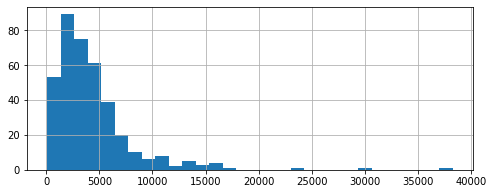

In [137]:
fulldf.POPESTIMATE2015[fulldf.Mortality_Rate == '* '].hist(figsize=(8,3), bins=30);


In [138]:
# We still need to dig deeper to find the exact population distribution
pop_levels = [0,1000,5000,10000,15000,20000,50000,100000,500000,10**6]

for i in range(1,len(pop_levels)):
    print("For population: %d - %d" %(pop_levels[i-1],pop_levels[i]), " median mortality rate: %.1f" 
          %(fulldf.Mortality_Rate[(fulldf.Mortality_Rate != '* ') & (pop_levels[i-1] < fulldf.POPESTIMATE2015) 
                               & (fulldf.POPESTIMATE2015 < pop_levels[i])].median()))

For population: 0 - 1000  median mortality rate: nan
For population: 1000 - 5000  median mortality rate: 49.0
For population: 5000 - 10000  median mortality rate: 47.8
For population: 10000 - 15000  median mortality rate: 48.0
For population: 15000 - 20000  median mortality rate: 49.2
For population: 20000 - 50000  median mortality rate: 48.5
For population: 50000 - 100000  median mortality rate: 46.6
For population: 100000 - 500000  median mortality rate: 41.6
For population: 500000 - 1000000  median mortality rate: 35.2


In [139]:
# From the above we see that still the mortality rate is higher in low population areas where it was given that '*' indicates
# less than 16 incidents

# Let's see how many countries actually did report the number of cases

print('Not * ')
for i in range(1,len(pop_levels)):
    print(" # For populatoion %d - %d: " %(pop_levels[i-1],pop_levels[i]), " %.1f" 
         %(fulldf[(fulldf.Mortality_Rate != '* ') & (pop_levels[i-1] < fulldf.POPESTIMATE2015) & 
                 (fulldf.POPESTIMATE2015 < pop_levels[i])].shape[0]))

Not * 
 # For populatoion 0 - 1000:   0.0
 # For populatoion 1000 - 5000:   33.0
 # For populatoion 5000 - 10000:   317.0
 # For populatoion 10000 - 15000:   318.0
 # For populatoion 15000 - 20000:   256.0
 # For populatoion 20000 - 50000:   851.0
 # For populatoion 50000 - 100000:   388.0
 # For populatoion 100000 - 500000:   455.0
 # For populatoion 500000 - 1000000:   92.0


In [140]:
# a closer look at number of records for very low-population counties (< 5000)
print("not '*'")
population_levels = [2500, 3000, 3500, 4000, 4500, 5000]

for i in range(1, len(population_levels)):
    print("# records between","%d-%d population" % (population_levels[i-1], population_levels[i]), 
                                      fulldf[(fulldf.Mortality_Rate != '* ') &
                                             (fulldf.POPESTIMATE2015 <= population_levels[i]) &
                                             (fulldf.POPESTIMATE2015 > population_levels[i-1])].shape[0]) 

print("'*'") 
for i in range(1, len(population_levels)):
    print("# records between","%d-%d population" % (population_levels[i-1], population_levels[i]), 
                                      fulldf[(fulldf.Mortality_Rate == '* ') &
                                             (fulldf.POPESTIMATE2015 <= population_levels[i]) &
                                             (fulldf.POPESTIMATE2015 > population_levels[i-1])].shape[0]) 

not '*'
# records between 2500-3000 population 1
# records between 3000-3500 population 4
# records between 3500-4000 population 7
# records between 4000-4500 population 9
# records between 4500-5000 population 12
'*'
# records between 2500-3000 population 34
# records between 3000-3500 population 29
# records between 3500-4000 population 30
# records between 4000-4500 population 30
# records between 4500-5000 population 15



I think we have plenty of information now to use to decide what to do with the observations where mortality rate is missing.
The fact is, that because mortality rate is our target variable, we probably could have skipped all this investigation and opted to simply remove the missing records. However, I think this was a worthwhile exercise to walk through, if just for the sake of demonstration. In any case, I'm inclined to remove the rows with missing mortality rate values entirely. Here's why:

Low-population counties are already well-represented in the data (there are plenty of non-null observations).
It seems redundant (and a source of unnecessary noise) to impute missing values in the outcome variable in this case.
I think it's safe to treat the null values as if they were randomly drawn (they may not be entirely random, but it seems unlikely to me that we're losing much information at this time by removing them).
Given that lower populations tend (when they do report) to have higher mortality rates, I suspect that it's misleading to state that the asterisks represent counties which reported "fewer than 16" cases of mortality. Instead, I believe that the asterisks more likely represent counties which failed to collect and/or report mortality data. Note that we are dealing with normalized mortality rates -- per capita (100,000). I'm confident that those records should be omitted.
(!)note: If this seems arbitrary to you, then you're reading it correctly. Data science involves many subjective decisions! Just be sure that you've done your due diligence and can explain and defend your decision-making process.

Now, let's filter out the records with missing mortality rate values.

In [141]:
fulldf = fulldf[fulldf.Mortality_Rate != '* ']

In [142]:
fulldf.shape

(2755, 19)

In [143]:
# It's time to convert the different data types to uniform data types
fulldf.Med_Income = pd.to_numeric(fulldf.Med_Income)

In [144]:
# Incidence_Rate
# Let's use this script to see which values fail to convert to numeric:
values = []
for _, j in enumerate(fulldf.Incident_Rate):
    try:
        pd.to_numeric(j)
    except:
        values.append(j)
        
pd.Series(values).value_counts()[:10]

[P1 note]     147
60.8 #          3
57.2 #          3
*               3
59.1 #          2
59.4 #          2
62 #            2
71.1 #          2
83.5 #          1
59.9 #          1
dtype: int64

## Model Building

In [145]:
fulldf.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incident_Rate,Avg_Ann_Incidence,Recent Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,02020,78326.0,120747,23245,122426,21393,243173,44638,51.3,126,stable,33.1,80,298695
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,02050,51012.0,6396,2708,6627,1774,13023,4482,51,6,stable,39.7,4,17946
7,AK,"Fairbanks North Star Borough, Alaska",7752,3523,4229,02090,71068.0,40605,6957,40210,5322,80815,12279,51.9,38,falling,33.6,23,99631
9,AK,"Juneau City and Borough, Alaska",2110,1145,965,02110,85746.0,13739,2433,13582,2213,27321,4646,51.2,15,rising,39.1,10,32756
10,AK,"Kenai Peninsula Borough, Alaska",5558,2596,2962,02122,63684.0,22391,6435,21668,5433,44059,11868,61.8,44,falling,39.4,28,58059


In [146]:
# Let's convert all categorical values to quantative and then seperate the target variable from the features

fulldf.rename(columns={'Recent Trend' : 'RecentTrend'}, inplace= True)

In [155]:
fulldf.replace({'RecentTrend': {'* ','stable'}}, inplace=True)

In [148]:
#fulldf.replace({'RecenTrend': {'stable': '1', 'falling':'0'}},inplace=True)

In [150]:
def one_hot_encode(x,term):
    if x==term:
        return 1
    else:
        return 0

In [153]:
fulldf['Rising'] = fulldf.RecentTrend.apply(lambda x:one_hot_encode(x,'rising'))
fulldf['Falling'] = fulldf.RecentTrend.apply(lambda x:one_hot_encode(x,'falling'))

In [156]:
fulldf.RecentTrend.value_counts()

stable       1816
falling       735
[P1 note]     147
rising         29
*              28
Name: RecentTrend, dtype: int64

In [157]:
y = pd.to_numeric(fulldf.Mortality_Rate).values
X = fulldf.loc[:,['All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income',
            'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With',
            'All_Without', 'Incident_Rate', 'Falling', 'Rising',
            'POPESTIMATE2015']]

In [158]:
X.head()

,All_Poverty,M_Poverty,F_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incident_Rate,Falling,Rising,POPESTIMATE2015
2,23914,10698,13216,78326.0,120747,23245,122426,21393,243173,44638,51.3,0,0,298695
3,4364,2199,2165,51012.0,6396,2708,6627,1774,13023,4482,51,0,0,17946
7,7752,3523,4229,71068.0,40605,6957,40210,5322,80815,12279,51.9,1,0,99631
9,2110,1145,965,85746.0,13739,2433,13582,2213,27321,4646,51.2,0,1,32756
10,5558,2596,2962,63684.0,22391,6435,21668,5433,44059,11868,61.8,1,0,58059


In [159]:
# Converting all the inappropriate values in incident rates with nan and filling them up.
X['Incident_Rate'] = pd.to_numeric(X.Incident_Rate, errors='coerce')

In [161]:
X.Incident_Rate = X.Incident_Rate.fillna(X.Incident_Rate.median())

In [162]:
sum(X.Incident_Rate.isnull())

0

In [163]:
for col in ['All_Poverty', 'M_Poverty', 'F_Poverty',
            'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With',
            'All_Without']:
    X[col + 'PC'] = X[col] / X.POPESTIMATE2015 * 10**5

In [164]:
X.head()

,All_Poverty,M_Poverty,F_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,...,POPESTIMATE2015,All_PovertyPC,M_PovertyPC,F_PovertyPC,M_WithPC,M_WithoutPC,F_WithPC,F_WithoutPC,All_WithPC,All_WithoutPC
2,23914,10698,13216,78326.0,120747,23245,122426,21393,243173,44638,...,298695,8006.160130,3581.579872,4424.580257,40424.848089,7782.185842,40986.959942,7162.155376,81411.808032,14944.341218
3,4364,2199,2165,51012.0,6396,2708,6627,1774,13023,4482,...,17946,24317.396634,12253.426948,12063.969687,35640.254096,15089.713585,36927.449014,9885.211189,72567.703109,24974.924774
7,7752,3523,4229,71068.0,40605,6957,40210,5322,80815,12279,...,99631,7780.710823,3536.048017,4244.662806,40755.387379,6982.766408,40358.924431,5341.710913,81114.311811,12324.477321
9,2110,1145,965,85746.0,13739,2433,13582,2213,27321,4646,...,32756,6441.567957,3495.542801,2946.025156,41943.460740,7427.646843,41464.159238,6756.014165,83407.619978,14183.661009
10,5558,2596,2962,63684.0,22391,6435,21668,5433,44059,11868,...,58059,9573.020548,4471.313664,5101.706884,38565.941542,11083.552938,37320.656573,9357.722317,75886.598116,20441.275254


D:\Anaconda Navigator\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


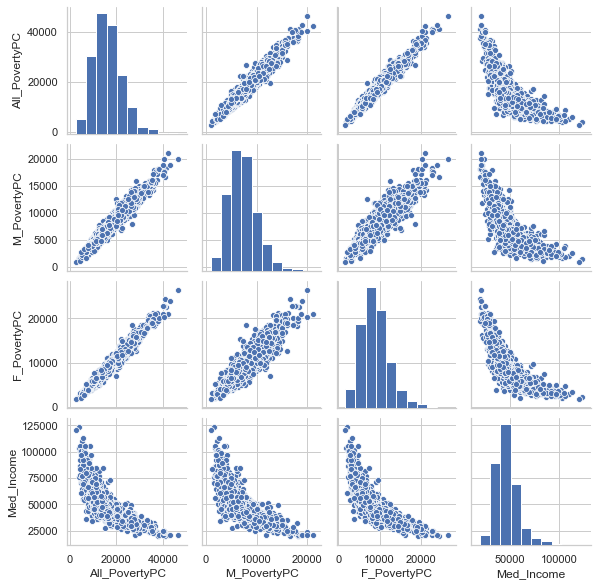

In [166]:
# scatterplots (hat tip Sebastian Raschka from his book "Python Machine Learning")
sns.set(style='whitegrid', context='notebook')
sns.pairplot(X[['All_PovertyPC', 'M_PovertyPC', 'F_PovertyPC', 'Med_Income']], size=2)
plt.show()

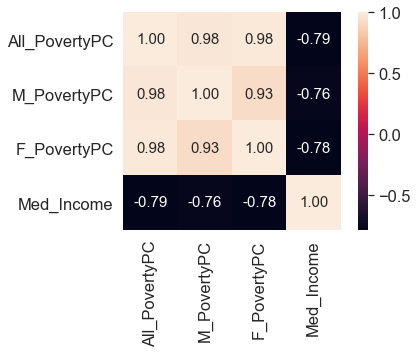

In [167]:
cols = ['All_PovertyPC', 'M_PovertyPC', 'F_PovertyPC', 'Med_Income']
cm = np.corrcoef(X[['All_PovertyPC', 'M_PovertyPC', 'F_PovertyPC', 'Med_Income']].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},
                 yticklabels=cols, xticklabels=cols)
plt.show()

In [168]:
X.drop(['M_PovertyPC', 'F_PovertyPC'], axis=1, inplace=True)

In [169]:
X.drop(['M_WithPC', 'F_WithPC'], axis=1, inplace=True)
X.drop(['M_WithoutPC', 'F_WithoutPC'], axis=1, inplace=True)
X.head()

,All_Poverty,M_Poverty,F_Poverty,Med_Income,M_With,M_Without,F_With,F_Without,All_With,All_Without,Incident_Rate,Falling,Rising,POPESTIMATE2015,All_PovertyPC,All_WithPC,All_WithoutPC
2,23914,10698,13216,78326.0,120747,23245,122426,21393,243173,44638,51.3,0,0,298695,8006.160130,81411.808032,14944.341218
3,4364,2199,2165,51012.0,6396,2708,6627,1774,13023,4482,51.0,0,0,17946,24317.396634,72567.703109,24974.924774
7,7752,3523,4229,71068.0,40605,6957,40210,5322,80815,12279,51.9,1,0,99631,7780.710823,81114.311811,12324.477321
9,2110,1145,965,85746.0,13739,2433,13582,2213,27321,4646,51.2,0,1,32756,6441.567957,83407.619978,14183.661009
10,5558,2596,2962,63684.0,22391,6435,21668,5433,44059,11868,61.8,1,0,58059,9573.020548,75886.598116,20441.275254


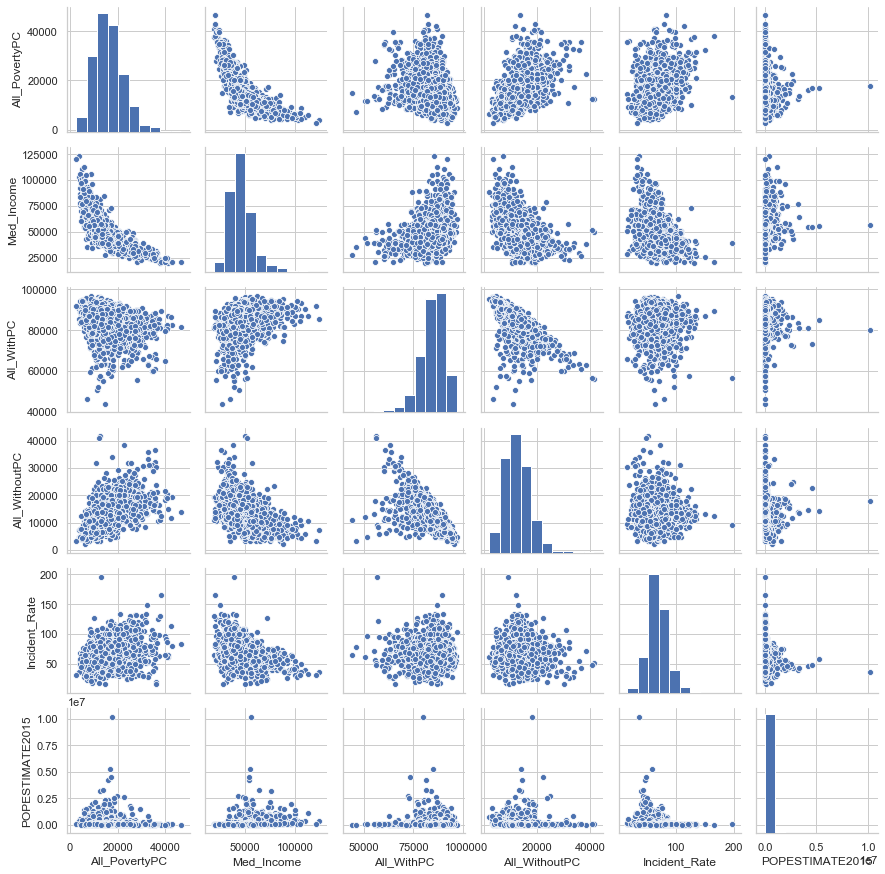

In [171]:
cols = ['All_PovertyPC', 'Med_Income', 'All_WithPC', 'All_WithoutPC',
                'Incident_Rate', 'POPESTIMATE2015']
sns.set(style='whitegrid', context='notebook')
sns.pairplot(X[cols], height=2)
plt.show()

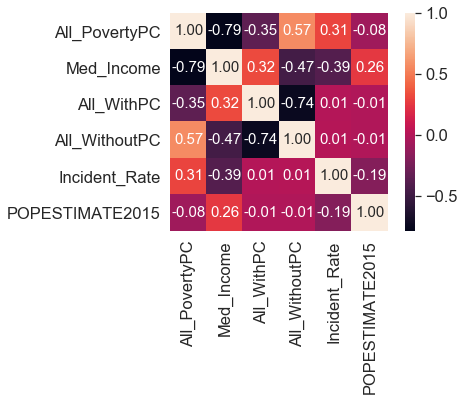

In [172]:
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},
                 yticklabels=cols, xticklabels=cols)
plt.show()

## Linear Regression Model

In [174]:
cols = ['All_PovertyPC', 'Med_Income', 'All_WithPC',  'All_WithoutPC',
        'Incident_Rate', 'POPESTIMATE2015', 'Falling', 'Rising', 'All_Poverty',
        'All_With', 'All_Without']

In [175]:
X = X[cols]

In [176]:
X['Constant'] = 1

D:\Anaconda Navigator\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
X.reset_index(drop=True, inplace=True)

In [181]:
X.dropna(inplace=True)

In [182]:
# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [183]:
lr = sm.OLS(y,X,hasconst=True)

In [184]:
result = lr.fit()

In [185]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     788.4
Date:                Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:03:43   Log-Likelihood:                -9021.7
No. Observations:                2755   AIC:                         1.807e+04
Df Residuals:                    2743   BIC:                         1.814e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
All_PovertyPC       0.0001   3.73e-05      2.760      0.006    2.98e-05       0.000
Med_Income         -0.0001   1.89e-05     -7.409      0.000      -0.000      -0.000
All_WithPC      -5.131e-05   3.06e-05     -1.676      0.094      -0.000    8.71e-06
All_WithoutPC    3.175e-05   4.62e-05      0.687      0.492   -5.88e-05       0.000
Incident_Rate       0.6016      0.008     72.616      0.000       0.585       0.618
POPESTIMATE2015 -3.778e-05   2.42e-05     -1.563      0.118   -8.52e-05    9.63e-06
Falling             0.6599      0.318      2.076      0.038       0.037       1.283
Rising              1.6193      1.204      1.345      0.179      -0.742       3.980
All_Poverty     -4.079e-05   1.16e-05     -3.515      0.000   -6.35e-05    -1.8e-05
All_With         4.003e-05   2.49e-05      1.608      0.108   -8.79e-06    8.89e-05
All_Without      6.561e-05   2.93e-05      2.241      0.025    8.21e-06       0.000
Constant           14.6198      3.212      4.551      0.000       8.321      20.919
==============================================================================
Omnibus:                      250.024   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.712
Skew:                           0.451   Prob(JB):                    2.69e-173
Kurtosis:                       5.471   Cond. No.                     1.27e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""